In [9]:
import numpy as np
from scipy import misc
from scipy.ndimage import affine_transform, zoom

from skimage import io, img_as_ubyte, img_as_float
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb, rgba2rgb
from skimage.io import imread, imsave, imshow, show, imshow_collection, imread_collection
from skimage import color, exposure, data
from skimage.util import invert, random_noise, montage
from skimage.transform import SimilarityTransform, warp, swirl

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen ### Works only for PIL images
import PIL.ImageStat as stat

## Question 1.1

In [10]:
def intXform(f,mode,param=1):
    
    a,b = f.shape
    c = 1
    g = np.zeros([a,b])
    
    if mode == 'negative':
        g = -f
        
    elif mode == 'log':
        map = lambda x: c * np.log10(x+1)/np.log10(1+1)
        for i in range(a):
            for j in range(b):
                g[i,j]= map(f[i,j])
        
    elif mode == 'gamma':
        map = lambda x: c*x**param  # no scaling needed
        for i in range(a):
            for j in range(b):
                g[i,j]= map(f[i,j])
                
    else:
        print("mode = 'negative', 'log', 'gamma'")
        return
    
    return [g, map]

def log_trans(x,c):
    return c * np.log10(x+1)/np.log10(1+1)

## Question 1.2

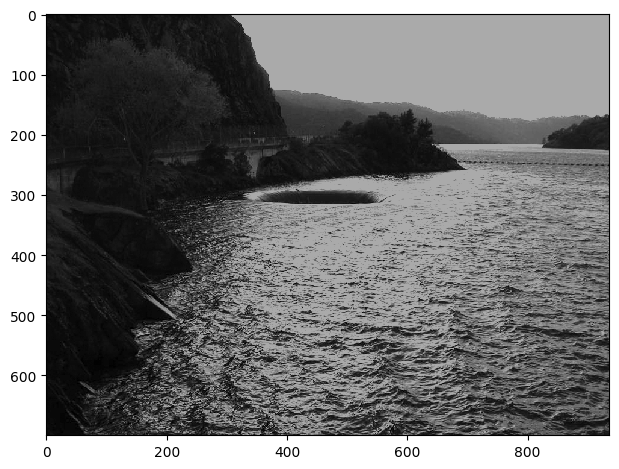

In [11]:
f_spill = imread("data/labB_images/spillway-dark.tif")
f_spill = rescale(f_spill,1)
g_spill, log_map = intXform(f_spill,'log')

imshow(g_spill)

## Question 1.3

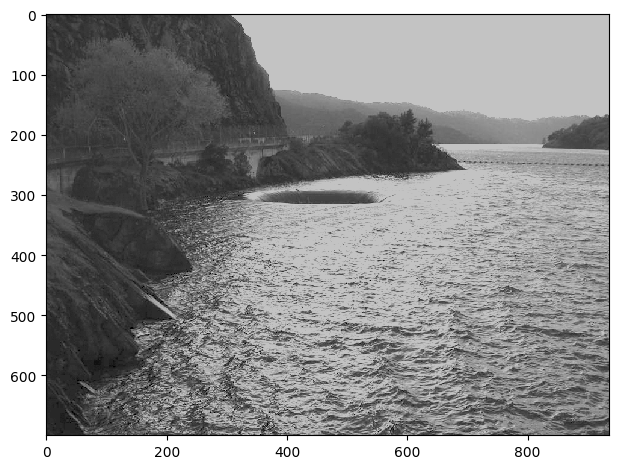

In [12]:
f_spill = imread("data/labB_images/spillway-dark.tif")
f_spill = rescale(f_spill,1) # Map intensities to a range [0,1]
g_spill, gamma_map = intXform(f_spill,'gamma',0.5)

imshow(g_spill)

## Question 1.4

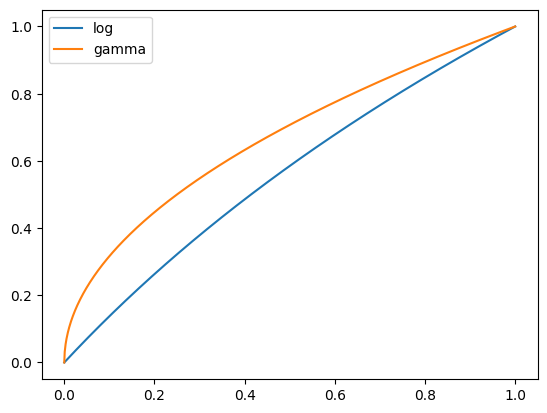

In [13]:
x = np.linspace(0,1,1000)

plt.figure()
plt.plot(x,log_map(x))
plt.plot(x,gamma_map(x))
plt.legend(['log','gamma'])
plt.show()

An improvement is seen with the gamma transformation because it maps the darker pixels to higher intensities
High contrast = Variation between light and dark intensities

## Question 2.1

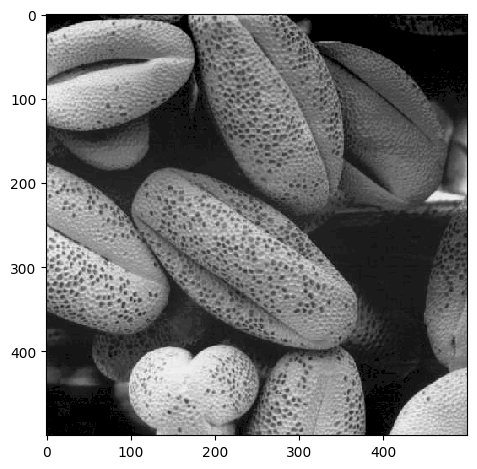

In [14]:
f_pollen = imread("data/labB_images/pollen-lowcontrast.tif")
g_pollen = exposure.rescale_intensity(f_pollen)
imshow(g_pollen)

## Question 2.2

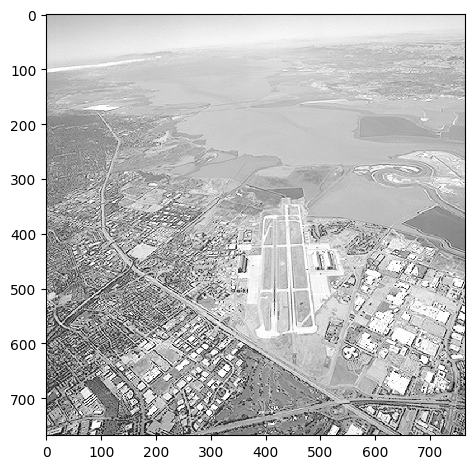

In [15]:
f_view = imread("data/labB_images/aerialview-washedout.tif")
g_view = exposure.adjust_log(f_view, gain=1, inv=True)
imshow(g_view)

## Question 2.3

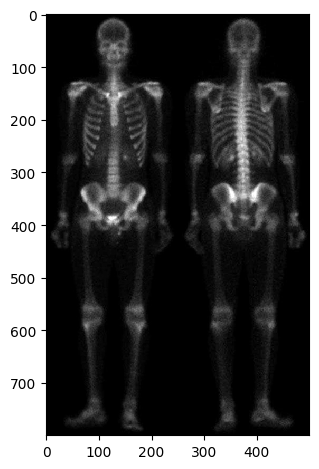

In [16]:
f_skel = imread("data/labB_images/skeleton.tif")
g_skel = exposure.adjust_log(f_skel, gain=1, inv=False)
imshow(g_skel)

## Question 2.4

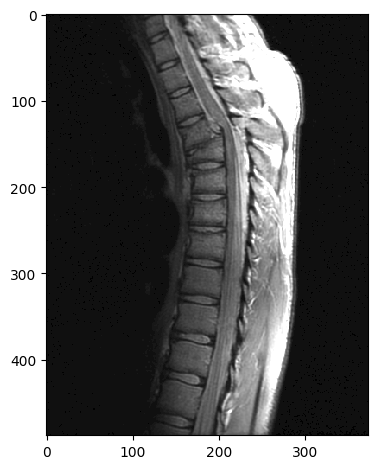

In [17]:
f_spine = imread("data/labB_images/spine.tif")
g_spine = exposure.adjust_gamma(f_spine, gamma=0.5, gain=1)
imshow(g_spine)

## Question 3a

In [18]:
def imageHist(f, mode):
    
    a,b = f.shape    
    h = np.zeros(256)
    count = 0
    
    if mode == 'n':
        for i in range(a):
            for j in range(b):
                h[f[i,j]] += 1 
                count += 1
        h = h/count
        
    elif mode == 'u':
        for i in range(a):
            for j in range(b):
                h[f[i,j]] += 1         
    
    else:
        print("mode = 'n' or 'u'")
        return
            
    return h

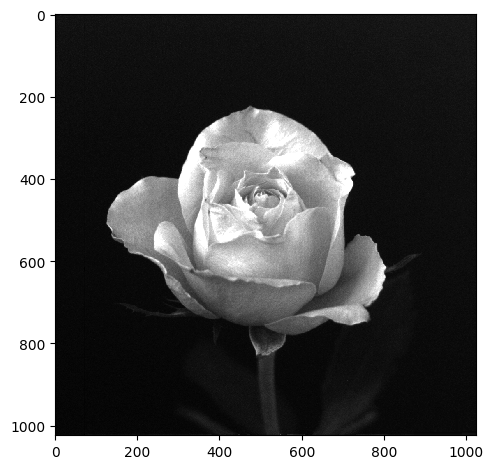

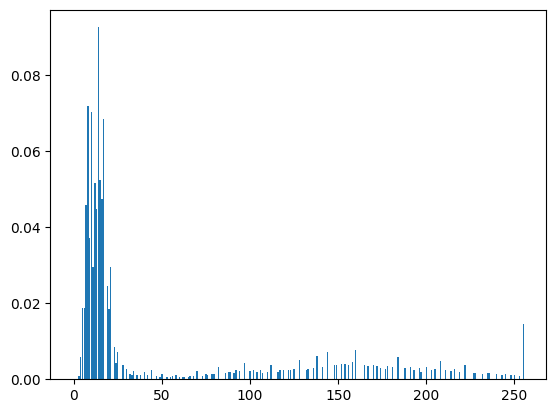

In [19]:
f_rose = imread("data/labB_images/rose1024.tif")
f_rose_hist = imageHist(f_rose, 'n')
imshow(f_rose)

plt.figure()
plt.bar(np.arange(0,256),f_rose_hist)
plt.show()

The concentration of low intensity peaks in the histogram show that there is significant black pixels in the image. A wide range of intensties are used with an even distribution of intensity levels which corresponds to high contrast

## Question 4a

In [20]:
def histEqual(f):
    a,b = f.shape 
    p = imageHist(f, 'n')
    cdf = np.cumsum(p)
    map = np.round(255*cdf)
    g = np.zeros([a,b],dtype='uint8')
    
    for i in range(a):
        for j in range(b):
            g[i,j]= map[f[i,j]]
    
    return g

## Question 4b

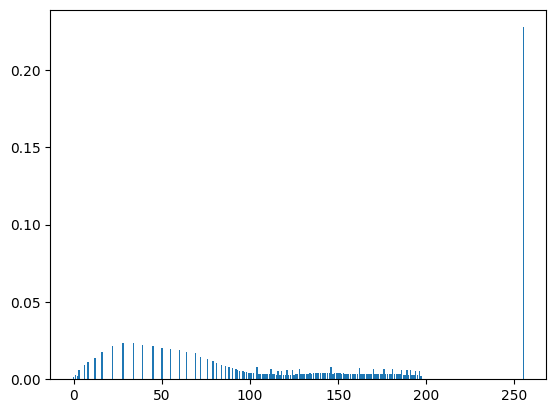

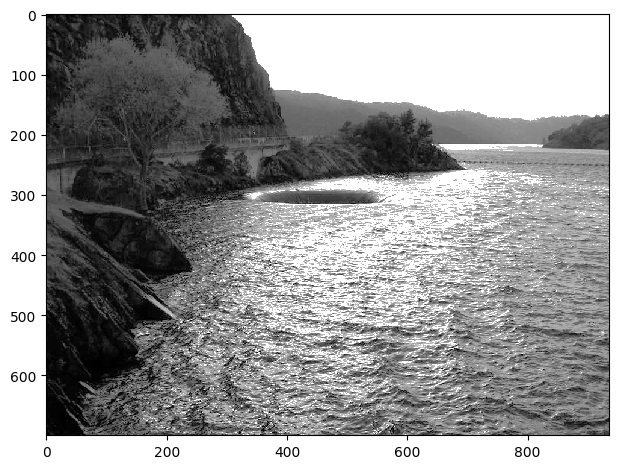

In [21]:
f_spill = imread("data/labB_images/spillway-dark.tif")
g_spill = histEqual(f_spill)

g_spill_hist = imageHist(g_spill, 'n')

plt.figure()
plt.bar(np.arange(0,256),g_spill_hist)
plt.show()

imshow(g_spill, cmap=plt.cm.gray)

## Question 4c

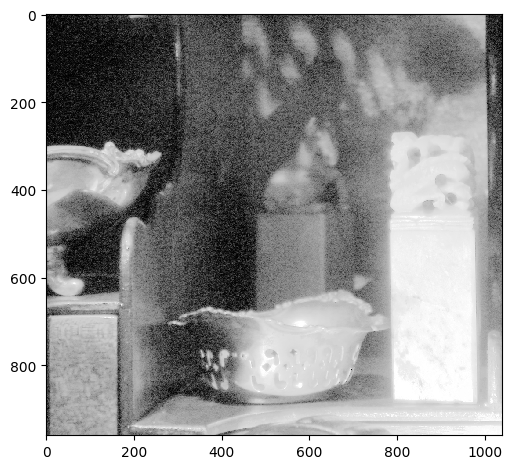

In [22]:
f_horse = imread("data/labB_images/hidden-horse.tif")
g_horse = histEqual(f_horse)
imshow(g_horse)

## Question 5

In [23]:
def highlight(f,ints_lower, ints_upper,mode):
    
    a,b = f.shape
    g = np.zeros([a,b],dtype="uint8")  # Must specify otherwise image expected in float form [0,1]
                                       # Error: Float out of standard range results
    if mode == 'linear':
        for i in range(a):
            for j in range(b):
                
                if f[i,j] > ints_lower and f[i,j] < ints_upper:
                    g[i,j] = 200
                else:
                    g[i,j] = f[i,j]
                    
    elif mode == 'binary':
        for i in range(a):
            for j in range(b):
                
                if f[i,j] > ints_lower and f[i,j] < ints_upper:
                    g[i,j] = int(200)
                else:
                    g[i,j] = int(10) 
                    
    else:
        print("mode must be 'linear' or 'binary'")
        return
                    
    return g                
                    

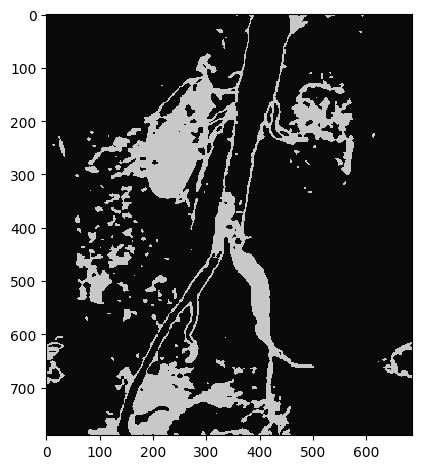

In [24]:
f_kidney = imread("data/labB_images/angiogram-aortic-kidney.tif")
g_kidney = highlight(f_kidney, 140,200,'binary')

imshow(g_kidney, cmap=plt.cm.gray)

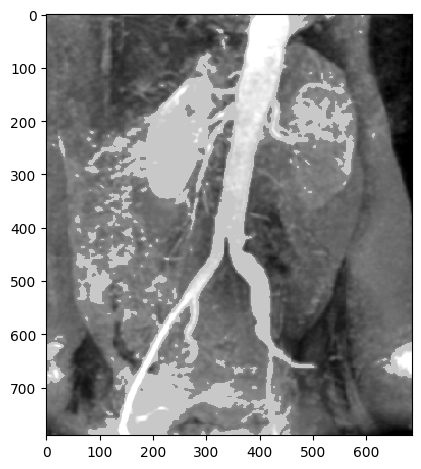

In [25]:
f_kidney = imread("data/labB_images/angiogram-aortic-kidney.tif")
g_kidney = highlight(f_kidney, 140,200,'linear')

imshow(g_kidney, cmap=plt.cm.gray)

In [26]:
def bit_plane(f):
    a,b = f.shape
    planes = 8
    g = np.zeros([a,b,8],dtype="uint8")
    
    for i in range(a):
        for j in range(b):
            bits = np.binary_repr(f[i,j],planes)
            for k in range(planes):
                g[i,j,k] = bits[-k]         
    
    return g

In [27]:
f_eye = imread("data/labB_images/fractal-iris.tif")
g_eye = bit_plane(f_eye)

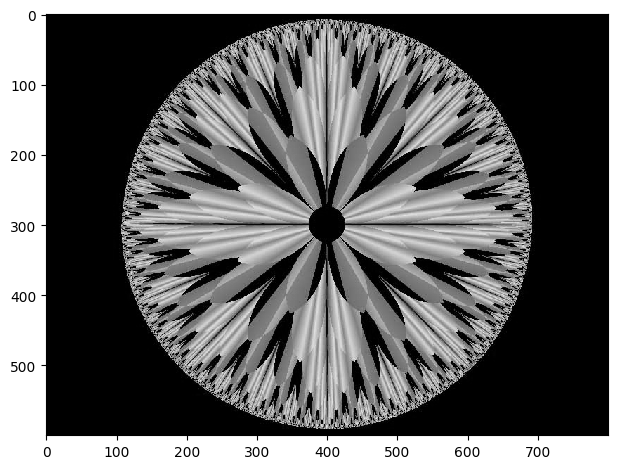

In [28]:
imshow(f_eye, cmap=plt.cm.gray)

/home/marcelln/Digital-Image-Processing/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


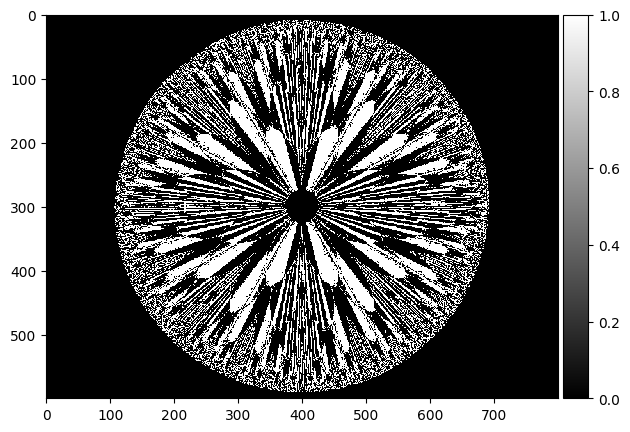

In [29]:
imshow(g_eye[:,:,6], cmap=plt.cm.gray)

## Question 7 (skimage exposure library)

In [30]:
f_city1 = rescale(imread("data/labB_images/city1.jpg"),1)  # Change to float
f_city2 = rescale(imread("data/labB_images/city2.jpg"),1)  # Change to float

g_city1_equ = img_as_ubyte(exposure.equalize_hist(f_city1))
g_city1_matched = img_as_ubyte(exposure.match_histograms(f_city1, f_city2))
count,bins = exposure.histogram(f_city1)

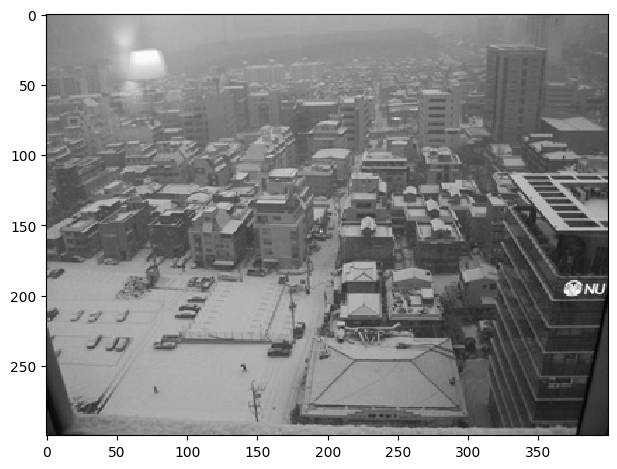

In [31]:
imshow(f_city1, cmap=plt.cm.gray)

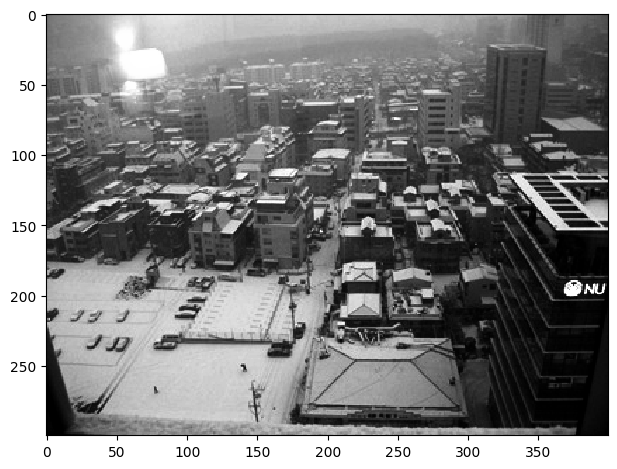

In [32]:
imshow(g_city1_matched, cmap=plt.cm.gray)

In [33]:
def histogram_matching_DIP(im_in,im_ref):
    a,b = im_in.shape
    im_out = np.zeros([a,b],dtype="uint8")
    
    p_in = imageHist(im_in, 'n')
    cdf_in = np.cumsum(p_in)
    map_r2s = (np.round(255*cdf_in),np.arange(256))         # Match tuple output of built
                                                            # in function
#    CDS_r2s = exposure.cumulative_distribution(im_in)      # Built in function giving 
#    map_r2s = (np.round(CDS_r2s[0]*255),CDS_r2s[1])        # only 252 bins city1

    CDS_z2v = exposure.cumulative_distribution(im_ref)
    map_z2v = (np.round(CDS_z2v[0]*255),map_r2s[1])

    map_r2z = (np.zeros([256]),np.arange(256))

    for i,j in enumerate(map_r2z[0]):
        index_min = np.argmin(np.abs(map_z2v[0]-map_r2s[0][i]))  # find the index of 
        map_r2z[0][i] = map_z2v[1][index_min]              # closest matching intensities
        
    for m in range(a):
        for n in range(b):
            im_out[m,n]=map_r2z[0][im_in[m,n]]            
        
    return im_out

In [34]:
## Question 8

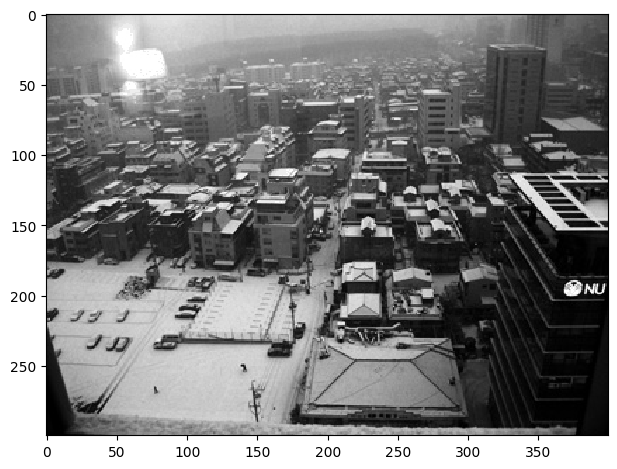

In [35]:
im_in = imread("data/labB_images/city2.jpg")
im_ref = imread("data/labB_images/city2.jpg")

h_city1 = histogram_matching_DIP(im_in,im_ref) # Change back to uint8
imshow(h_city1, cmap=plt.cm.gray)

For multichannel images perform each channel one at a time and add them